In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yfin
import seaborn as sns

In [3]:
start = datetime.date(2018, 1, 2)
end = datetime.date(2023, 12, 31)
stocks = yfin.download(["AAPL", "F", "WMT"], start, end, auto_adjust = False)["Adj Close"]
stocks.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,F,WMT
Date,,,
2018-01-02,40.479828,8.594530,29.111252
2018-01-03,40.472790,8.662416,29.365189
2018-01-04,40.660782,8.811769,29.391756
2018-01-05,41.123711,8.961124,29.565962
2018-01-08,40.970970,8.927178,30.002981


In [5]:
stocks.index = pd.to_datetime(stocks.index).strftime("%Y-%m-%d")

In [7]:
stocks_returns = stocks[["AAPL", "F", "WMT"]].dropna().pct_change()
stocks_returns = stocks_returns.dropna()
stocks_returns.head()

Ticker,AAPL,F,WMT
Date,,,
2018-01-03,-0.000174,0.007899,0.008723
2018-01-04,0.004645,0.017241,0.000905
2018-01-05,0.011385,0.016949,0.005927
2018-01-08,-0.003714,-0.003788,0.014781
2018-01-09,-0.000114,-0.005323,-0.012007


In [9]:
stock_returns_covariance_matrix = stocks_returns.cov()
print("Apple, Ford Motor and Walmart Covariance Matrix:")
print(stock_returns_covariance_matrix)
print("\nIs the covariance matrix symmetric?", np.allclose(stock_returns_covariance_matrix, stock_returns_covariance_matrix.T))

Apple, Ford Motor and Walmart Covariance Matrix:
Ticker      AAPL         F       WMT
Ticker                              
AAPL    0.000398  0.000194  0.000103
F       0.000194  0.000668  0.000068
WMT     0.000103  0.000068  0.000199

Is the covariance matrix symmetric? True


In [11]:
stock_returns_correlation_matrix = stocks_returns.corr()
print("Apple, Ford Motor and Walmart Correlation Matrix:")
print(stock_returns_correlation_matrix)
print("\nIs the correlation matrix symmetric?", np.allclose(stock_returns_correlation_matrix, stock_returns_correlation_matrix.T))

Apple, Ford Motor and Walmart Correlation Matrix:
Ticker      AAPL         F       WMT
Ticker                              
AAPL    1.000000  0.376460  0.365246
F       0.376460  1.000000  0.185249
WMT     0.365246  0.185249  1.000000

Is the correlation matrix symmetric? True


In [15]:
def cov_to_corr(cov_matrix):
    d = np.sqrt(np.diag(cov_matrix))
    corr_matrix = cov_matrix / np.outer(d, d)
    return corr_matrix

def corr_to_cov(corr_matrix, std_devs):
    cov_matrix = corr_matrix * np.outer(std_devs, std_devs)
    return cov_matrix

In [17]:
stocks_returns_std = stocks_returns.std()

cov_to_corr(stock_returns_correlation_matrix)

Ticker,AAPL,F,WMT
Ticker,,,
AAPL,1.000000,0.376460,0.365246
F,0.376460,1.000000,0.185249
WMT,0.365246,0.185249,1.000000


In [19]:
corr_to_cov(stock_returns_correlation_matrix, stocks_returns_std)

Ticker,AAPL,F,WMT
Ticker,,,
AAPL,0.000398,0.000194,0.000103
F,0.000194,0.000668,0.000068
WMT,0.000103,0.000068,0.000199


In [21]:
def is_positive_definite(matrix):
    return np.all(np.linalg.eigvals(matrix) > 0)

A = stock_returns_correlation_matrix

print("Is A positive definite?", is_positive_definite(A))
print("Eigenvalues:", np.linalg.eigvals(A))
print("Determinant:", np.linalg.det(A))
print("Rank:", np.linalg.matrix_rank(A))

Is A positive definite? True
Eigenvalues: [1.62523832 0.55989764 0.81486404]
Determinant: 0.7414994665765815
Rank: 3


In [23]:
def is_positive_semidefinite(matrix):
    return np.all(np.linalg.eigvals(matrix) >= 0)

A = stock_returns_correlation_matrix

print("Is A positive semidefinite?", is_positive_semidefinite(A))
print("Eigenvalues:", np.linalg.eigvals(A))
print("Determinant:", np.linalg.det(A))
print("Rank:", np.linalg.matrix_rank(A))

Is A positive semidefinite? True
Eigenvalues: [1.62523832 0.55989764 0.81486404]
Determinant: 0.7414994665765815
Rank: 3


In [25]:
S= np.array([[25,15,-5],
             [15,18,0],
             [-5,0,11]])

L_numpy = np.linalg.cholesky(S)
print("\nNumPy Cholesky factor:")
print(L_numpy)


NumPy Cholesky factor:
[[ 5.  0.  0.]
 [ 3.  3.  0.]
 [-1.  1.  3.]]


In [27]:
two_stock_returns = stocks_returns[["AAPL", "F"]]
original_correlation = two_stock_returns.corr()
original_correlation

Ticker,AAPL,F
Ticker,,
AAPL,1.00000,0.37646
F,0.37646,1.00000


In [29]:
def generate_correlated_samples(n_samples, correlation_matrix):
    # Compute Cholesky factorization
    L = np.linalg.cholesky(correlation_matrix)

    # Generate independent standard normal samples
    Z = np.random.standard_normal((correlation_matrix.shape[0], n_samples))

    # Generate correlated samples
    X = L @ Z

    return X

n_samples = 10000
X = generate_correlated_samples(n_samples, original_correlation)
X = pd.DataFrame(generate_correlated_samples(n_samples, original_correlation).T, columns = ["APPL","F"])
# Compute sample correlation
sample_correlation = X.corr()

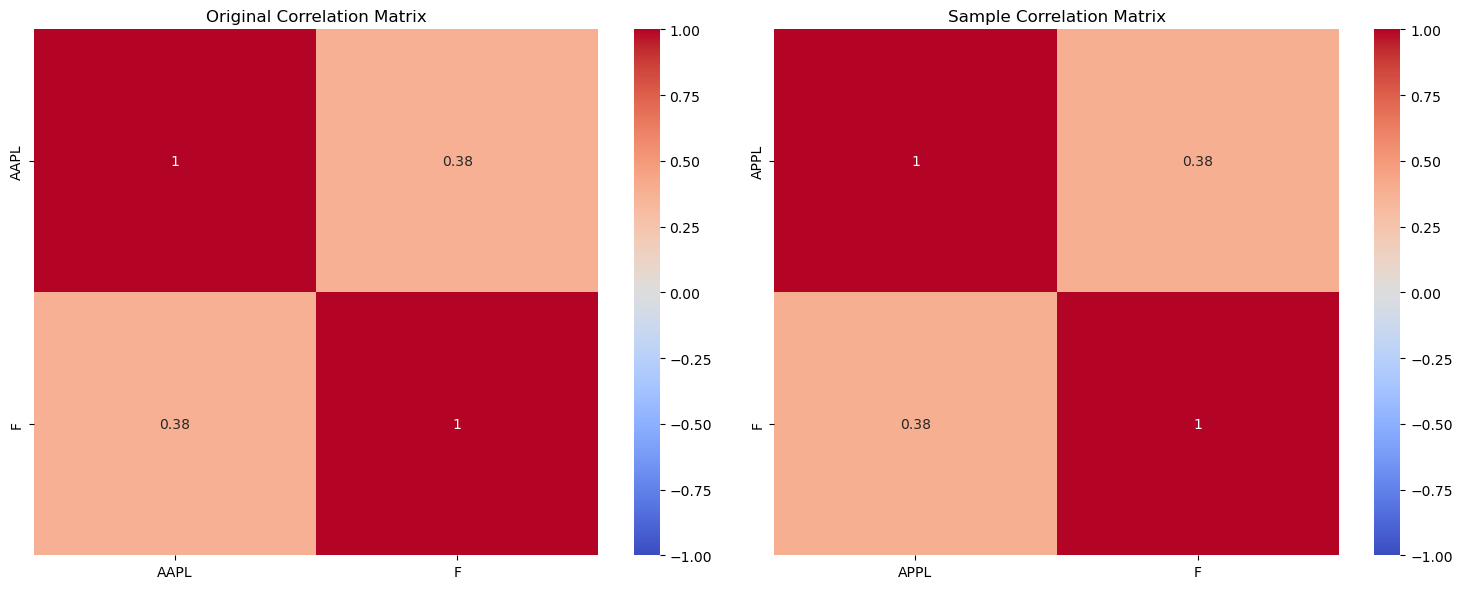

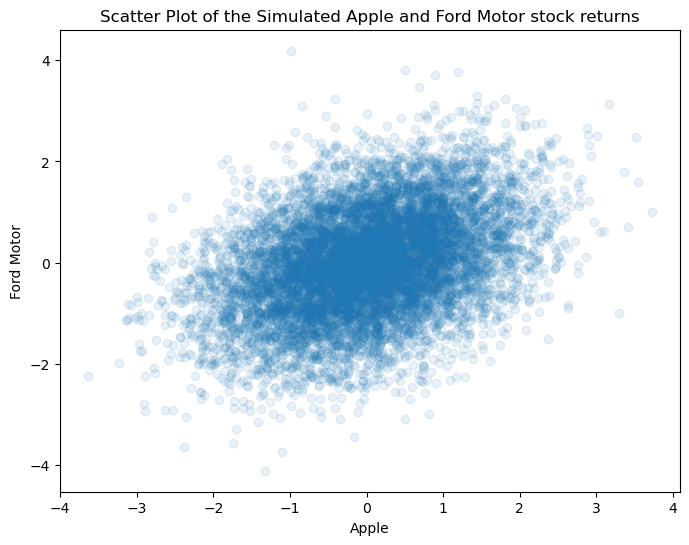

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(original_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax1)
ax1.set_title('Original Correlation Matrix')
ax1.set(xlabel='', ylabel='')


sns.heatmap(sample_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax2)
ax2.set_title('Sample Correlation Matrix')
ax2.set(xlabel='', ylabel='')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X["APPL"], X["F"], alpha=0.1)
plt.title('Scatter Plot of the Simulated Apple and Ford Motor stock returns')
plt.xlabel('Apple')
plt.ylabel('Ford Motor')
plt.show()